# Runtime

We benchmark the runtime of the PPA-AF heuristic as the number of agents grows.

In [1]:
import sys
import random
import time

# add library to path (or else, src not visible)
sys.path.insert(0, "../../")

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm

from src.AllocationSolver import AllocationSolver
from src.dists import SymmetricDiscreteDistribution, Distribution, UniformDistribution, NormalDistribution, ParetoDistribution
from src.plots import plot_alpha_versus_lambda, plot_Z_versus_lambda
from src.random_problem import generate_random_problem, generate_normal_distribution, generate_pareto_distribution

# use seaborn style plotting for poster presentation
sns.set_context("paper")
sns.set_style("whitegrid")

In [2]:
# set seed for reproducibility
random.seed(42)
np.random.seed(42)

n = np.arange(2, 50)
times = np.zeros_like(n, dtype=float)

for i, size in tqdm(enumerate(n)):
    prob = AllocationSolver(
        [Distribution((1, 2), (0.5, 0.5)) for _ in range(size)],
        initial_supply=1.5*size,
        allocation_method="lambda_time"
    )

    for _ in range(5):
        start = time.perf_counter()
        prob.optimize_lambda(tol=0.01, monte_carlo=True, batch=True)
        end = time.perf_counter()

        times[i] = (1/5) * (end - start)

# save data
np.save("lambda_time.npy", times)

48it [10:01, 12.54s/it]


Text(0.5, 1.0, 'Time to Optimize $\\lambda$ for PPA-AF')

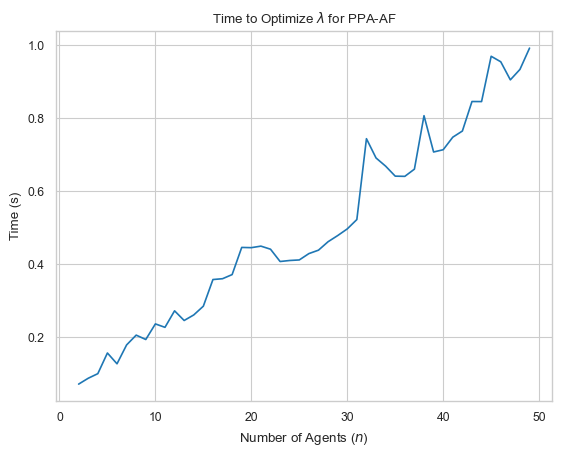

In [3]:
# load data
n = np.arange(2, 50)
times = np.load("lambda_time.npy")

plt.plot(n, times)
plt.xlabel(r"Number of Agents ($n$)")
plt.ylabel("Time (s)")
plt.title("Time to Optimize $\lambda$ for PPA-AF")